In [2]:
import pandas as pd
import os
import numpy as np
from PIL import Image
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import matplotlib.pyplot as plt
import joblib


2024-11-24 23:23:53.858025: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-24 23:23:53.975006: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-24 23:23:54.084198: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732470834.206638   38765 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732470834.235512   38765 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-24 23:23:54.344834: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [3]:
data = pd.read_csv('/home/rohitb/projects/ml/Project/data/oasis_cleaned.csv')
data


,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS1_0001_MR1,0.0,0.0,74.0,2.00,3.00,29.00,0.0,1344.0,0.743,1.306
1,OAS1_0002_MR1,0.0,0.0,55.0,4.00,1.00,29.00,0.0,1147.0,0.810,1.531
2,OAS1_0003_MR1,0.0,0.0,73.0,4.00,3.00,27.00,0.5,1454.0,0.708,1.207
3,OAS1_0004_MR1,1.0,0.0,28.0,3.82,1.47,22.06,0.5,1588.0,0.803,1.105
4,OAS1_0005_MR1,1.0,0.0,18.0,3.88,1.56,22.07,0.5,1737.0,0.848,1.010
...,...,...,...,...,...,...,...,...,...,...,...
431,OAS1_0285_MR2,1.0,0.0,20.0,3.29,2.95,22.69,0.5,1469.0,0.847,1.195
432,OAS1_0353_MR2,1.0,0.0,22.0,3.22,3.18,22.74,0.5,1684.0,0.790,1.042
433,OAS1_0368_MR2,1.0,0.0,22.0,3.76,1.29,22.10,0.5,1580.0,0.856,1.111
434,OAS1_0379_MR2,0.0,0.0,20.0,3.27,3.04,23.72,0.5,1262.0,0.861,1.390


# Data preprocessing
- adding demented, non demented column for better MRI classification

In [4]:
to_be_labelled_data = data.drop(columns=['Hand'])
to_be_labelled_data.head()
# Rename Educ column to EDUC to match training data format
to_be_labelled_data = to_be_labelled_data.rename(columns={'Educ': 'EDUC'})


In [6]:
# Load the trained ensemble model
ensemble_model = joblib.load('/home/rohitb/projects/ml/Project/sequential_data_analysis/trained_models/ensamble_nb_xgb.joblib')
nb_model = joblib.load('/home/rohitb/projects/ml/Project/sequential_data_analysis/trained_models/optimal_gaussianNB.joblib')
xgb_model = joblib.load('/home/rohitb/projects/ml/Project/sequential_data_analysis/trained_models/optimal_XGBoost.joblib')
to_label = to_be_labelled_data[['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']]
nb_test_probs = nb_model.predict_proba(to_label)
xgb_test_probs = xgb_model.predict_proba(to_label)
test_meta_features = np.column_stack([nb_test_probs, xgb_test_probs])
labels = ensemble_model.predict(test_meta_features)
data['Group'] = labels
data.head()




/home/rohitb/projects/ml/Project/venv/lib/python3.12/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.4.1.post1 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/rohitb/projects/ml/Project/venv/lib/python3.12/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.4.1.post1 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/rohitb/projects/ml/Project/venv/lib/python3.12/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpick

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Group
0,OAS1_0001_MR1,0.0,0.0,74.0,2.00,3.00,29.00,0.0,1344.0,0.743,1.306,2
1,OAS1_0002_MR1,0.0,0.0,55.0,4.00,1.00,29.00,0.0,1147.0,0.810,1.531,2
2,OAS1_0003_MR1,0.0,0.0,73.0,4.00,3.00,27.00,0.5,1454.0,0.708,1.207,1
3,OAS1_0004_MR1,1.0,0.0,28.0,3.82,1.47,22.06,0.5,1588.0,0.803,1.105,1
4,OAS1_0005_MR1,1.0,0.0,18.0,3.88,1.56,22.07,0.5,1737.0,0.848,1.010,1


In [7]:
data = data[['ID','Group']]
data.head()

,ID,Group
0,OAS1_0001_MR1,2
1,OAS1_0002_MR1,2
2,OAS1_0003_MR1,1
3,OAS1_0004_MR1,1
4,OAS1_0005_MR1,1


In [8]:
root_dir = '/home/rohitb/projects/ml/Project/assets/OASIS-1/processed/'


# Data Preprocessing for MRI Scans
In the following cells, we will preprocess the MRI scan data by:
1. Loading the .gif images from the OASIS-1 dataset
2. Converting them to grayscale and resizing to 128x128 pixels
3. Normalizing pixel values to [0,1] range
4. Preparing labels from CDR scores
5. Converting data into format suitable for CNN training


In [12]:
# Create lists to store images and labels
images = []
labels = []

# Walk through 8 disks
for disk_num in tqdm(range(1, 12), desc='Processing disks'):
    disk_path = os.path.join(root_dir, f'disc{disk_num}')
    for folder in tqdm(os.listdir(disk_path), desc=f'Processing folders in disk {disk_num}', leave=False):
    # for folder in list(os.listdir(disk_path))[:10]:
        folder_path = os.path.join(disk_path, folder)
        if os.path.isdir(folder_path):
            # Get CDR score for this subject
            subject_id = folder  # Append _MR1 to match ID format in data
            try:
                cdr_score = data[data['ID'] == subject_id]['Group'].values[0]
                
                # Load all .gif images from this folder
                for img_file in os.listdir(folder_path):
                    if img_file.endswith('.gif'):
                        img_path = os.path.join(folder_path, img_file)
                        # Open and convert to grayscale numpy array
                        img = Image.open(img_path).convert('L')
                        img = img.resize((128, 128))  # Resize for consistency
                        img_array = np.array(img) / 255.0  # Normalize to [0,1]
                        images.append(img_array)
                        labels.append(cdr_score)
            except Exception as e:
                print(f"Error processing {subject_id}: {str(e)}")
                raise

# Convert to numpy arrays
X = np.array(images)
y = np.array(labels)

# Reshape images for CNN input
X = X.reshape(-1, 128, 128, 1)
# Looking at unique CDR values to determine number of classes
unique_cdrs = np.unique(y)
num_classes = len(unique_cdrs)
print(f"Unique CDR values: {unique_cdrs}")
print(f"Number of classes: {num_classes}")


Processing disks:   0%|          | 0/11 [00:00<?, ?it/s]

Processing disks:  45%|████▌     | 5/11 [00:11<00:14,  2.39s/it]


KeyboardInterrupt: 

In [10]:
# Reshape y to have shape (n_samples, 5)
y = np.zeros((len(y), 5))
for i, label in enumerate(labels):
    y[i, int(label)] = 1

# Split data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print key dataset statistics
print(f"Total number of images: {len(images)}")
print(f"Total number of labels: {len(labels)}")
print(f"Training samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")
print(f"Image dimensions: {X_train.shape[1:]}")
# Print shape of y after reshaping
print(f"Shape of y after reshaping: {y.shape[1]} classes")


Total number of images: 2922
Total number of labels: 2922
Training samples: 2337
Test samples: 585
Image dimensions: (128, 128, 1)
Shape of y after reshaping: 5 classes


# Building, Training and Testing the CNN Model

In the next few cells, we will:
1. Build a CNN model using TensorFlow/Keras with convolutional layers, max pooling, dense layers and dropout for regularization
2. Compile the model with appropriate loss function and optimizer
3. Train the model on our training data while monitoring validation performance
4. Evaluate the final model performance on the test set


In [11]:
# Build CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(128, 128, 1)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'), 
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='sigmoid')
])

# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Get model output for sample input
sample_output = model.predict(X_train[:1])
target_values = y_train[0]
output_values = sample_output[0]

print(f"Target values: {target_values}")
print(f"Model output values: {output_values}")



# Train model
history = model.fit(X_train, y_train,
                   epochs=20, 
                   validation_data=(X_test, y_test),
                   batch_size=32)

# Evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'\nTest accuracy: {test_acc:.3f}')
# Create directory if it doesn't exist
save_dir = './trained_models'
os.makedirs(save_dir, exist_ok=True)

# Save the model
model_save_path = os.path.join(save_dir, 'cnn_model_1.h5')
model.save(model_save_path)
print(f'\nModel saved to: {model_save_path}')


/home/rohitb/projects/ml/Project/venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-11-24 23:26:17.512791: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step
Target values: [1. 0. 0. 0. 0.]
Model output values: [0.5000189  0.49612713 0.49865317 0.50618804 0.49419093]
Epoch 1/20


2024-11-24 23:26:20.035045: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 153157632 exceeds 10% of free system memory.
2024-11-24 23:26:29.373586: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 65028096 exceeds 10% of free system memory.
2024-11-24 23:26:29.470542: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 30482432 exceeds 10% of free system memory.
2024-11-24 23:26:29.616624: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 27095040 exceeds 10% of free system memory.
2024-11-24 23:26:29.823938: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 30482432 exceeds 10% of free system memory.


33/74 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.5544 - loss: 0.9693

KeyboardInterrupt: 

In [29]:
# Build a deeper CNN model with different architecture
model2 = tf.keras.Sequential([
    # First conv block with batch normalization
    tf.keras.layers.Conv2D(32, 3, padding='same', input_shape=(128, 128, 1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(),
    
    # Second conv block
    tf.keras.layers.Conv2D(64, 3, padding='same'),
    tf.keras.layers.BatchNormalization(), 
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(),
    
    # Third conv block
    tf.keras.layers.Conv2D(128, 3, padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(),
    
    
    # Flatten and dense layers
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(5, activation='sigmoid')
])

# Compile with different optimizer and learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model2.compile(optimizer=optimizer,
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Train model with more epochs and early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history2 = model2.fit(X_train, y_train,
                     epochs=20,
                     validation_data=(X_test, y_test),
                     batch_size=32,
                     callbacks=[early_stopping])

# Evaluate model
test_loss2, test_acc2 = model2.evaluate(X_test, y_test)
print(f'\nTest accuracy of second model: {test_acc2:.3f}')
# Save the trained model
model_save_path = './trained_models/cnn_model_2.h5'
model2.save(model_save_path)
print(f'Model saved to {model_save_path}')


Epoch 1/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 179s 2s/step - accuracy: 0.5144 - loss: 8.6396 - val_accuracy: 0.6667 - val_loss: 0.7725
Epoch 2/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 166s 2s/step - accuracy: 0.5735 - loss: 1.0894 - val_accuracy: 0.6667 - val_loss: 0.7486
Epoch 3/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 201s 2s/step - accuracy: 0.6148 - loss: 0.9801 - val_accuracy: 0.6667 - val_loss: 0.7483
Epoch 4/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 170s 2s/step - accuracy: 0.6528 - loss: 0.8857 - val_accuracy: 0.6667 - val_loss: 0.7743
Epoch 5/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 165s 2s/step - accuracy: 0.6379 - loss: 0.8851 - val_accuracy: 0.6667 - val_loss: 0.7793
Epoch 6/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 201s 2s/step - accuracy: 0.6643 - loss: 0.8041 - val_accuracy: 0.6667 - val_loss: 0.7511
Epoch 7/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 164s 2s/step - accuracy: 0.6677 - loss: 0.7862 - val_accuracy: 0.6667 - val_loss: 0.7787
Epoch 8/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 165s 2s/step - accuracy: 0.6689 - loss: 0.7419 - val_accuracy: 0.6667 - v


Test accuracy of second model: 0.667
Model saved to ./trained_models/cnn_model_2.h5


In [30]:
# Build a third CNN model with a simpler architecture
model3 = tf.keras.Sequential([
    # First conv block
    tf.keras.layers.Conv2D(32, 5, padding='same', input_shape=(128, 128, 1)),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    # Second conv block
    tf.keras.layers.Conv2D(64, 3, padding='same'),
    tf.keras.layers.Activation('relu'), 
    tf.keras.layers.MaxPooling2D(),
    
    # Third conv block
    tf.keras.layers.Conv2D(128, 3, padding='same'),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(),
    
    # Dense layers
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(128, activation='relu'), 
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(5, activation='sigmoid')
])

# Compile model
model3.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
history3 = model3.fit(X_train, y_train,
                     epochs=20,
                     validation_data=(X_test, y_test),
                     batch_size=32)

# Evaluate model
test_loss3, test_acc3 = model3.evaluate(X_test, y_test)
print(f'\nTest accuracy of third model: {test_acc3:.3f}')

# Save the trained model
model_save_path = './trained_models/cnn_model_3.h5'
model3.save(model_save_path)
print(f'Model saved to {model_save_path}')



Epoch 1/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 102s 1s/step - accuracy: 0.5479 - loss: 1.0067 - val_accuracy: 0.6667 - val_loss: 0.8461
Epoch 2/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 101s 1s/step - accuracy: 0.6533 - loss: 0.7902 - val_accuracy: 0.6667 - val_loss: 0.8062
Epoch 3/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 92s 1s/step - accuracy: 0.6705 - loss: 0.7686 - val_accuracy: 0.6667 - val_loss: 0.7368
Epoch 4/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.6785 - loss: 0.7413 - val_accuracy: 0.6667 - val_loss: 0.7330
Epoch 5/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.6640 - loss: 0.7218 - val_accuracy: 0.6667 - val_loss: 0.7785
Epoch 6/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 103s 1s/step - accuracy: 0.6666 - loss: 0.7233 - val_accuracy: 0.6889 - val_loss: 0.6685
Epoch 7/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 94s 1s/step - accuracy: 0.6786 - loss: 0.6831 - val_accuracy: 0.6889 - val_loss: 0.7913
Epoch 8/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 95s 1s/step - accuracy: 0.7079 - loss: 0.6328 - val_accuracy: 0.6838 - val_l


Test accuracy of third model: 0.923
Model saved to ./trained_models/cnn_model_3.h5


# Model Comparison
In the following cells, we will compare the performance of the three CNN models we built. We'll analyze their training and validation metrics, including accuracy and loss curves over epochs, to understand how each architecture performed and determine which model is most effective for our MRI classification task.


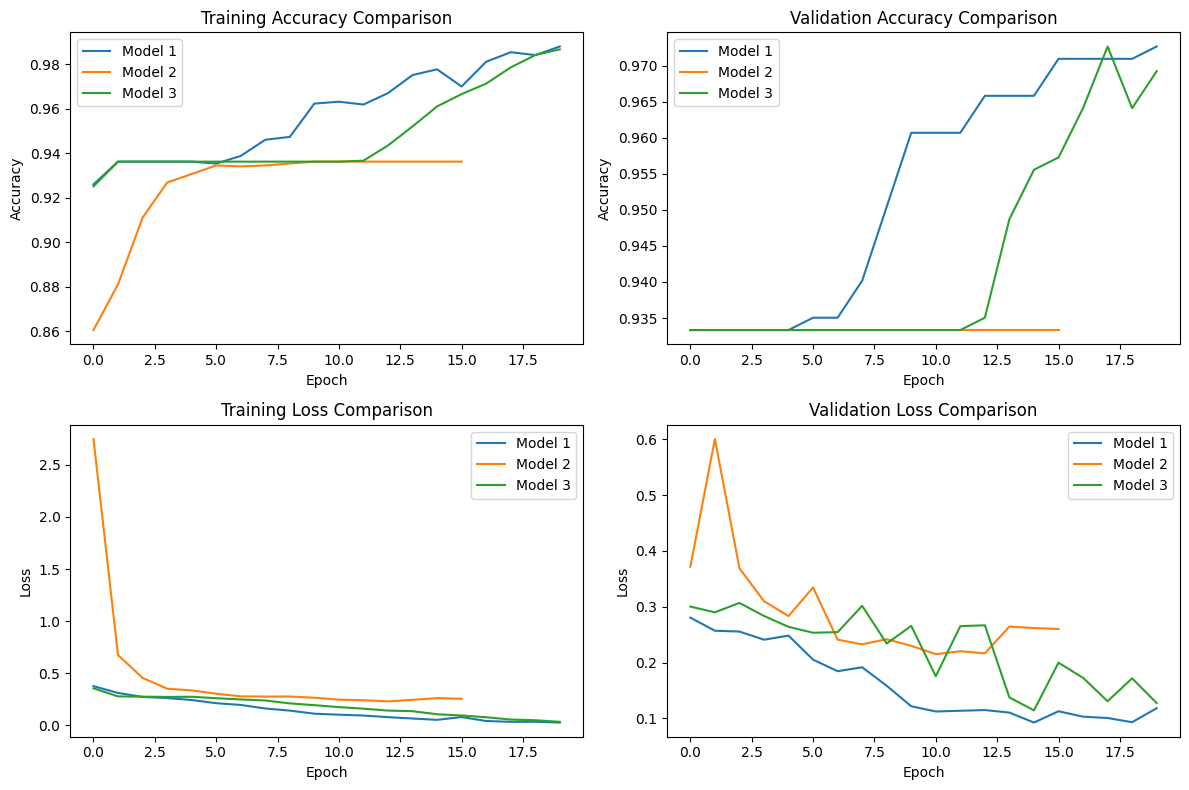

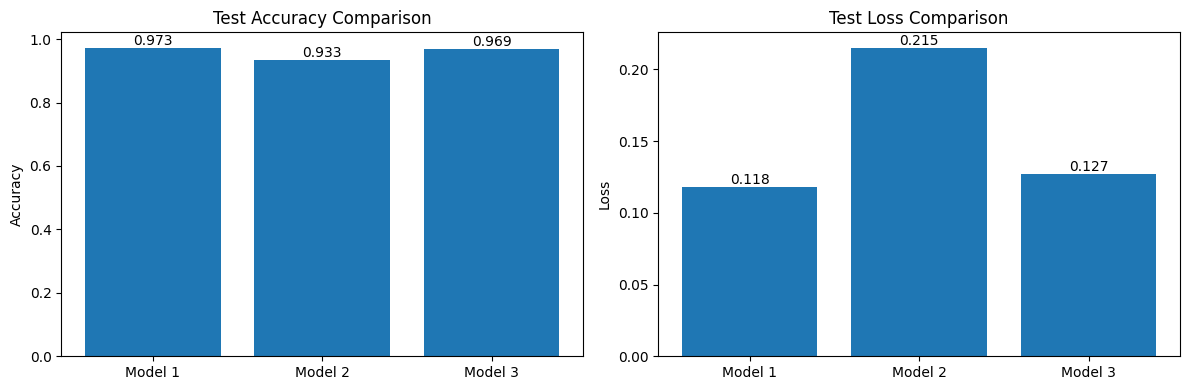


Best performing model: Model 1 with validation accuracy of 1.000


In [9]:
# Create figures for accuracy and loss comparisons/home/rohitb/projects/ml/Project/mri_data_analysis/data/oasis_cleaned.csv
plt.figure(figsize=(12, 8))

# Plot training accuracy for all models
plt.subplot(2, 2, 1)
plt.plot(history.history['accuracy'], label='Model 1')
plt.plot(history2.history['accuracy'], label='Model 2')
plt.plot(history3.history['accuracy'], label='Model 3')
plt.title('Training Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot validation accuracy for all models
plt.subplot(2, 2, 2)
plt.plot(history.history['val_accuracy'], label='Model 1')
plt.plot(history2.history['val_accuracy'], label='Model 2')
plt.plot(history3.history['val_accuracy'], label='Model 3')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training loss for all models
plt.subplot(2, 2, 3)
plt.plot(history.history['loss'], label='Model 1')
plt.plot(history2.history['loss'], label='Model 2')
plt.plot(history3.history['loss'], label='Model 3')
plt.title('Training Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot validation loss for all models
plt.subplot(2, 2, 4)
plt.plot(history.history['val_loss'], label='Model 1')
plt.plot(history2.history['val_loss'], label='Model 2')
plt.plot(history3.history['val_loss'], label='Model 3')
plt.title('Validation Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Create bar plots for test metrics
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Test Accuracy bar plot
models = ['Model 1', 'Model 2', 'Model 3']
accuracies = [test_acc, test_acc2, test_acc3]
ax1.bar(models, accuracies)
ax1.set_title('Test Accuracy Comparison')
ax1.set_ylabel('Accuracy')
for i, v in enumerate(accuracies):
    ax1.text(i, v, f'{v:.3f}', ha='center', va='bottom')

# Test Loss bar plot  
losses = [test_loss, test_loss2, test_loss3]
ax2.bar(models, losses)
ax2.set_title('Test Loss Comparison')
ax2.set_ylabel('Loss')
for i, v in enumerate(losses):
    ax2.text(i, v, f'{v:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Identify best performing model based on validation metrics
best_val_acc1 = max(history.history['val_accuracy'])
best_val_acc2 = max(history2.history['val_accuracy'])
best_val_acc3 = max(history3.history['val_accuracy'])

best_val_loss1 = min(history.history['val_loss'])
best_val_loss2 = min(history2.history['val_loss'])
best_val_loss3 = min(history3.history['val_loss'])

# Normalize metrics to 0-1 range for fair comparison
acc_max = max(best_val_acc1, best_val_acc2, best_val_acc3)
acc_min = min(best_val_acc1, best_val_acc2, best_val_acc3)
loss_max = max(best_val_loss1, best_val_loss2, best_val_loss3)
loss_min = min(best_val_loss1, best_val_loss2, best_val_loss3)

norm_acc1 = (best_val_acc1 - acc_min) / (acc_max - acc_min) if acc_max != acc_min else 1
norm_acc2 = (best_val_acc2 - acc_min) / (acc_max - acc_min) if acc_max != acc_min else 1
norm_acc3 = (best_val_acc3 - acc_min) / (acc_max - acc_min) if acc_max != acc_min else 1

norm_loss1 = 1 - ((best_val_loss1 - loss_min) / (loss_max - loss_min)) if loss_max != loss_min else 1
norm_loss2 = 1 - ((best_val_loss2 - loss_min) / (loss_max - loss_min)) if loss_max != loss_min else 1
norm_loss3 = 1 - ((best_val_loss3 - loss_min) / (loss_max - loss_min)) if loss_max != loss_min else 1

# Calculate combined score (average of normalized accuracy and inverted normalized loss)
scores = [
    (1, (norm_acc1 + norm_loss1) / 2),
    (2, (norm_acc2 + norm_loss2) / 2),
    (3, (norm_acc3 + norm_loss3) / 2)
]

best_model = max(scores, key=lambda x: x[1])

print(f"\nBest performing model: Model {best_model[0]} with validation accuracy of {best_model[1]:.3f}")
